In [2]:
import os
import glob
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import pydicom
import cv2
#from joblib import Parallel, delayed

In [3]:
!ls "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/05/AB090240/"  

D7594HI0  D7594HQC  D7594HQO  D7594I34	D7594IBG  D7594IBS  D7594IK8
D7594HI2  D7594HQE  D7594HQQ  D7594I36	D7594IBI  D7594IJU  D7594ISA
D7594HI4  D7594HQG  D7594HQS  D7594I38	D7594IBK  D7594IK0  D7594ISC
D7594HQ6  D7594HQI  D7594HQU  D7594I3A	D7594IBM  D7594IK2  D7594ISE
D7594HQ8  D7594HQK  D7594I30  D7594I3C	D7594IBO  D7594IK4  D7594ISG
D7594HQA  D7594HQM  D7594I32  D7594IBE	D7594IBQ  D7594IK6


In [4]:
ROOT = "/data3/wv2019/data/PLIC_MILANO_DICOM"
ROOT_OUT = "/data3/wv2019/data/processed/PLIC_MILANO_DICOM"

In [5]:
# define callbacks
def person_names_callback(dataset, data_element):
    if data_element.VR == "PN":
        data_element.value = "anonymous"
        
def curves_callback(dataset, data_element):
    if data_element.tag.group & 0xFF00 == 0x5000:
        del dataset[data_element.tag]

t2tag = 'PatientBirthDate'

In [6]:
### TODO
# - consider also Doppler mode
# - extend to the whole set of images
# - check whether the anonymized DICOM file differs from the original (except for the removed sensitive data)
# - parallelize code

In [7]:
data_len = len(glob.glob(os.path.join(ROOT, "*", "GEMS_IMG", "*", "*", "*", "*")))

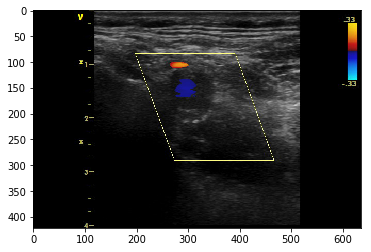

      (7fe1, 1072) [Unknown]                           LO: '#DopplerFreq'
      (7fe1, 1072) [Unknown]                           LO: '#UserControls.ScrollDoppler'


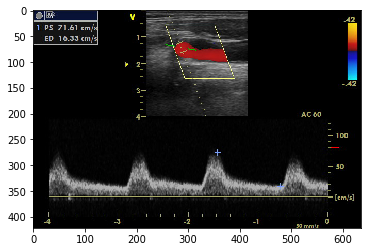

      (7fe1, 1012) [Unknown]                           LO: 'DopplerPWMovie'
            (7fe1, 1057) [Unknown]                           LT: 'Doppler(8)'
            (7fe1, 1057) [Unknown]                           LT: 'DopplerViewer'
            (7fe1, 1057) [Unknown]                           LT: 'DopplerViewer'
            (7fe1, 1057) [Unknown]                           LT: 'DopplerTraceViewer'
            (7fe1, 1057) [Unknown]                           LT: 'DopplerTraceViewer'
      (7fe1, 1072) [Unknown]                           LO: '#DopplerBaseline'
      (7fe1, 1072) [Unknown]                           LO: '#DopplerFreq'
      (7fe1, 1072) [Unknown]                           LO: '#DopplerMseProcInPlugin'
      (7fe1, 1072) [Unknown]                           LO: '#DopplerSampleVolume'
      (7fe1, 1072) [Unknown]                           LO: '#DopplerWindowType'
      (7fe1, 1072) [Unknown]                           LO: '#GcViewer.DopplerTraceSensitivity'
      (7fe1, 1072)

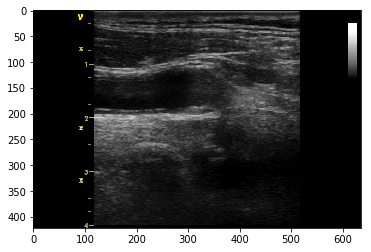

      (7fe1, 1072) [Unknown]                           LO: '#UserControls.ScrollDoppler'


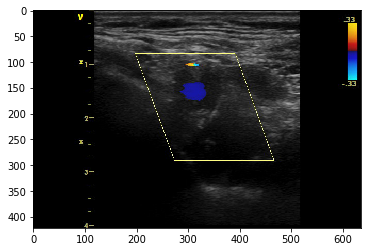

      (7fe1, 1072) [Unknown]                           LO: '#DopplerFreq'
      (7fe1, 1072) [Unknown]                           LO: '#UserControls.ScrollDoppler'


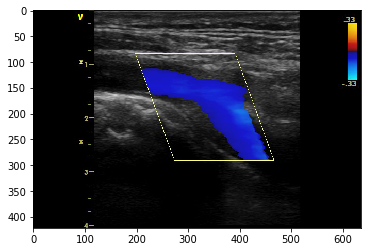

      (7fe1, 1072) [Unknown]                           LO: '#DopplerFreq'
      (7fe1, 1072) [Unknown]                           LO: '#UserControls.ScrollDoppler'


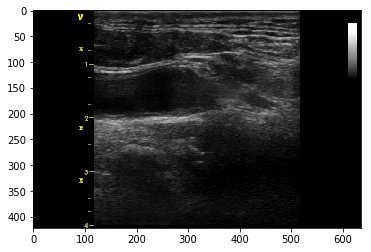

      (7fe1, 1072) [Unknown]                           LO: '#UserControls.ScrollDoppler'


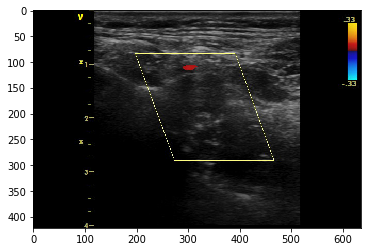

      (7fe1, 1072) [Unknown]                           LO: '#DopplerFreq'
      (7fe1, 1072) [Unknown]                           LO: '#UserControls.ScrollDoppler'


In [17]:
filepaths =["/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9D8",
            "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABAGE",
            "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA5U",
            "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9D4",
            "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94K",
            "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9TM",
            "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9LE"]

for fn in filepaths:
    ds = pydicom.read_file(fn)

        # clear private data
    ds.walk(person_names_callback)
    ds.walk(curves_callback)
        # address/sanitize patient IDs (remove spaces and non-alphanum characters)
    ds.data_element('PatientID').value = re.sub(r'\W+', '', ds.data_element('PatientID').value.strip().replace(" ", "_"))
        # type 2 tags
    if t2tag in ds:
        ds.data_element(t2tag).value = ''

    patientID = ds.PatientID

    dicomName = os.path.basename(fn).strip().replace(" ", "_")

    out_dir = os.path.join(ROOT_OUT, str(patientID))
    os.makedirs(out_dir, exist_ok=True)
    out_dicom = os.path.join(out_dir, f"{dicomName}.dcm")
        #out_png = os.path.join(out_dir, f"conv_{dicomName}.png")
    plt.imshow(ds.pixel_array)
    plt.show()
    
    desc = str(ds)
    for line in desc.split("\n"):
        if "doppler" in line.lower():
            print(line)
    #print(str(ds))


In [ ]:

filepath2 = "/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA5U"
ds1 = pydicom.read_file(filepath2)

    # clear private data
ds1.walk(person_names_callback)
ds1.walk(curves_callback)
    # address/sanitize patient IDs (remove spaces and non-alphanum characters)
ds1.data_element('PatientID').value = re.sub(r'\W+', '', ds1.data_element('PatientID').value.strip().replace(" ", "_"))
    # type 2 tags
if t2tag in ds1:
    ds1.data_element(t2tag).value = ''

patientID = ds1.PatientID
dicomName = os.path.basename(filepath2).strip().replace(" ", "_")

out_dir = os.path.join(ROOT_OUT, str(patientID))
os.makedirs(out_dir, exist_ok=True)
out_dicom = os.path.join(out_dir, f"{dicomName}.dcm")
    #out_png = os.path.join(out_dir, f"conv_{dicomName}.png")
plt.imshow(ds1.pixel_array)
plt.show()
print(ds1)

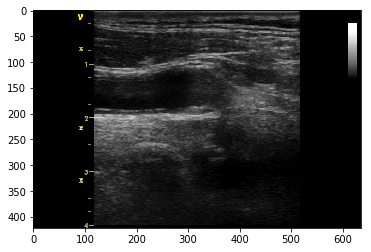

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA5U


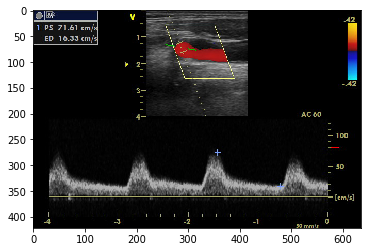

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABAGE


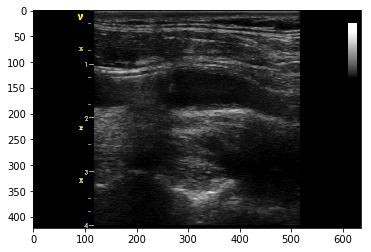

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA5S


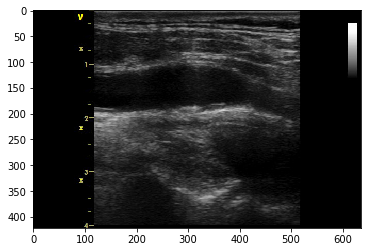

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA64


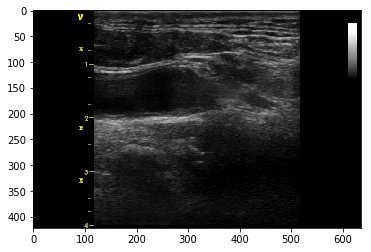

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9TM


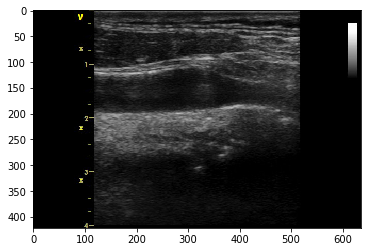

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA62


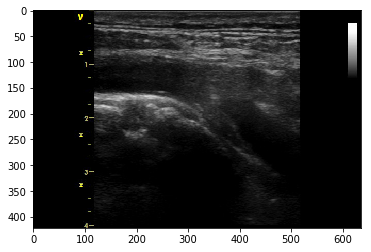

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94G


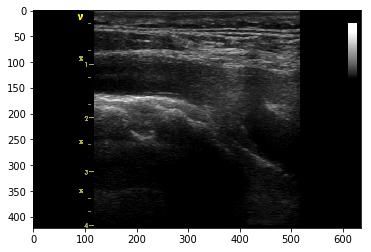

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94M


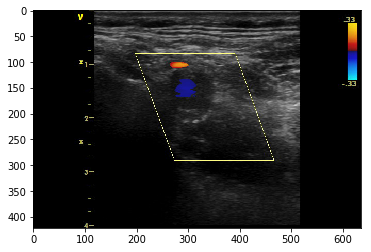

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9D8


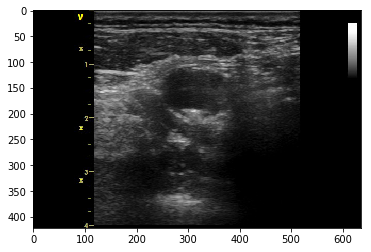

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA88


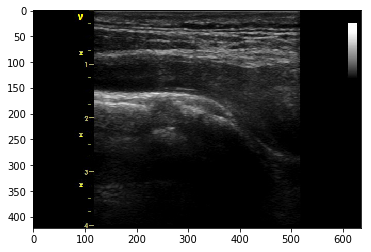

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94C


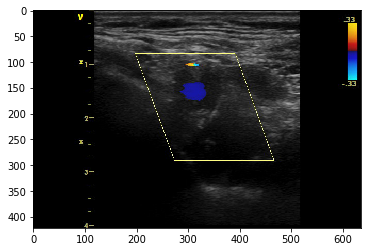

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9D4


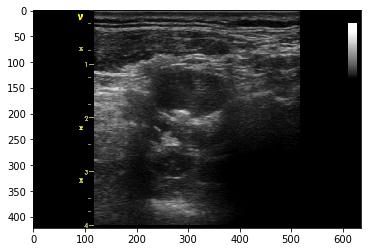

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA80


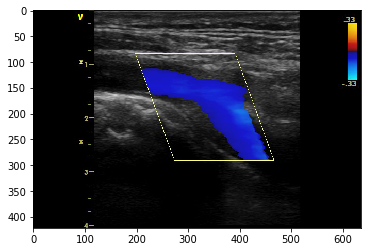

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94K


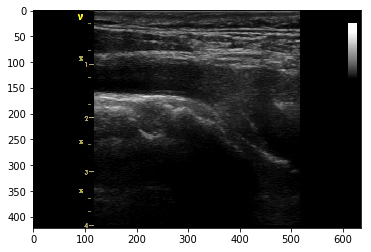

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9D0


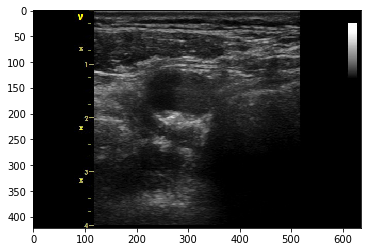

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABAGC


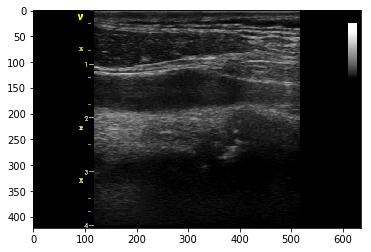

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA60


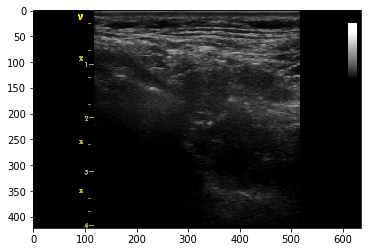

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9D2


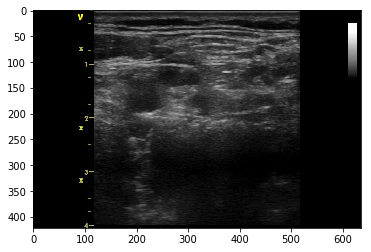

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA84


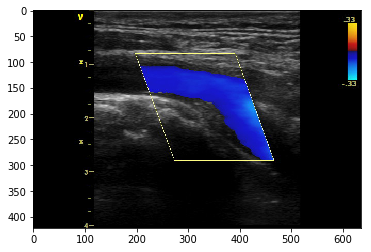

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94I


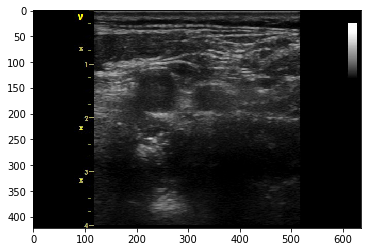

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA82


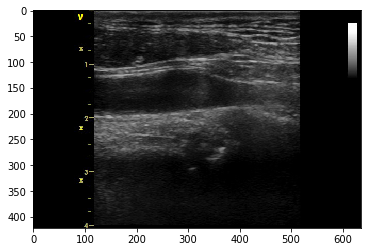

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9TO


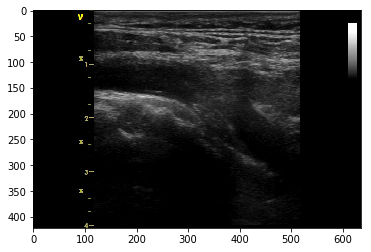

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9CS


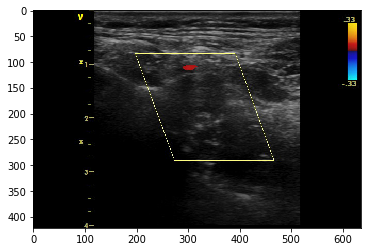

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9LE


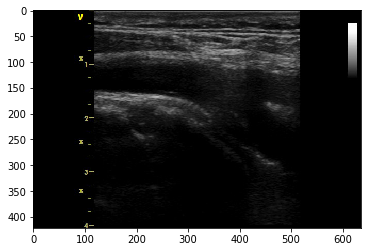

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94O


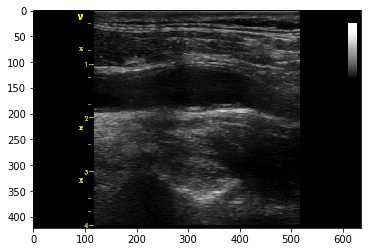

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA66


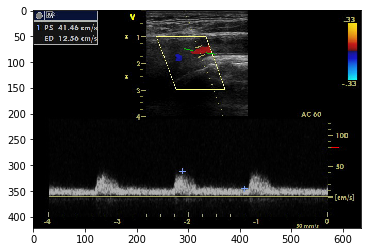

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9LI


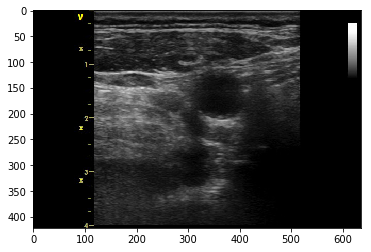

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABA86


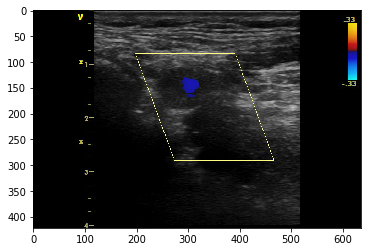

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9D6


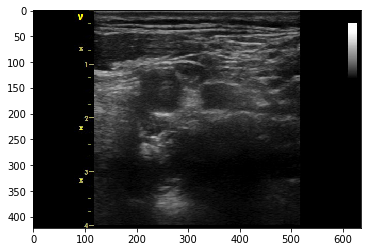

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IABAGA


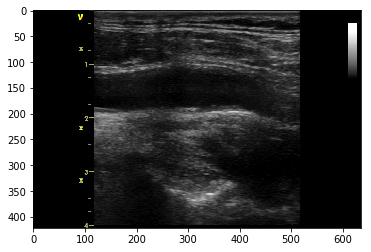

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9TQ


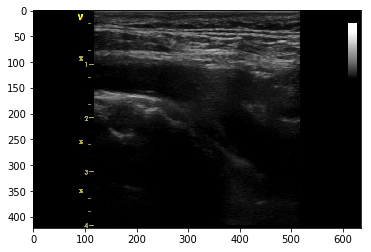

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9CQ


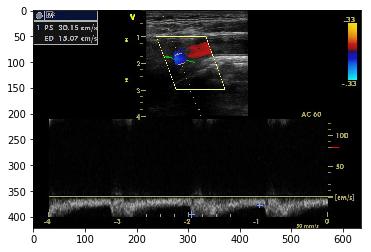

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9LG


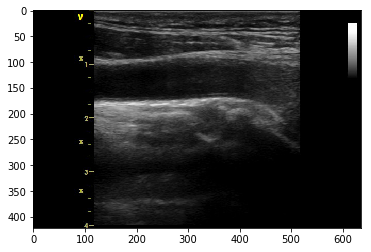

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9CU


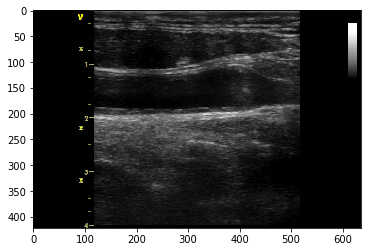

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9LK


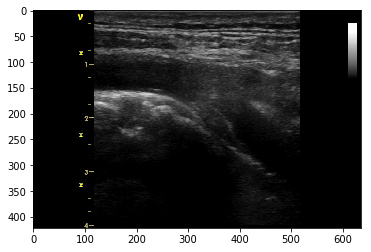

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB94E


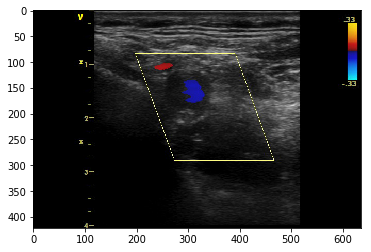

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9DA


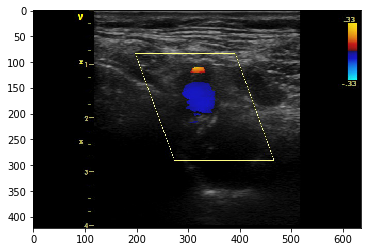

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/AC101435/D7IAB9DC


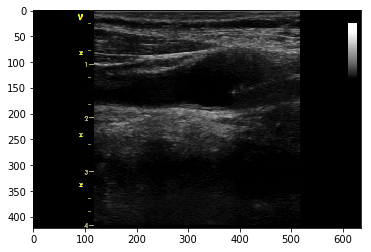

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K14U


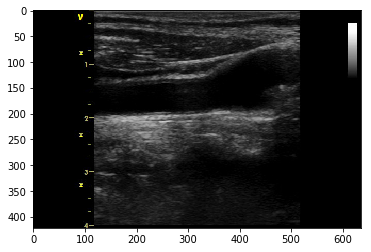

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K156


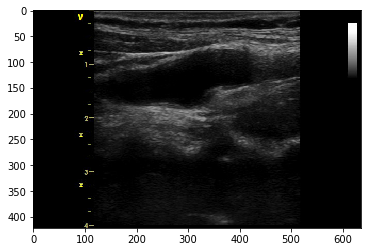

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K152


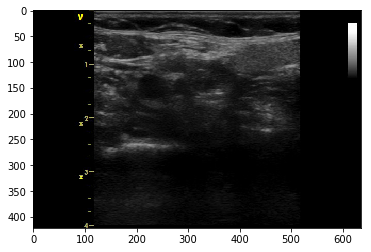

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1O0


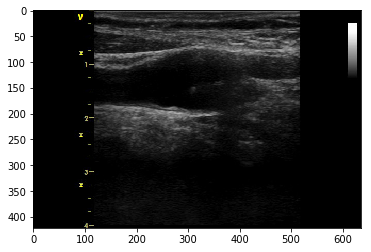

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K14O


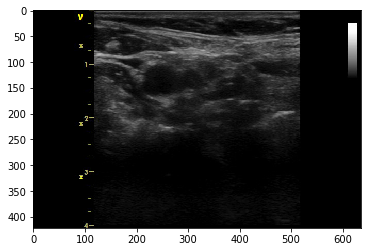

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1M6


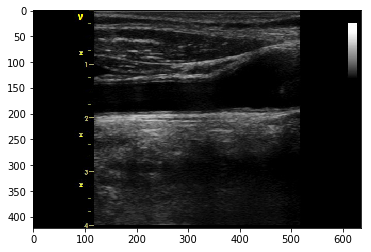

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K14K


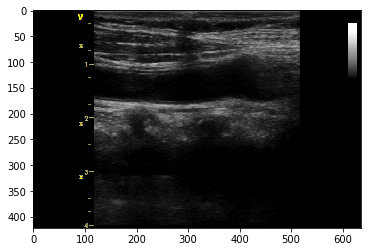

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DM


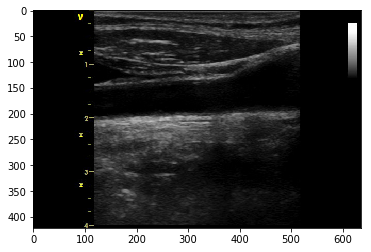

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K0SE


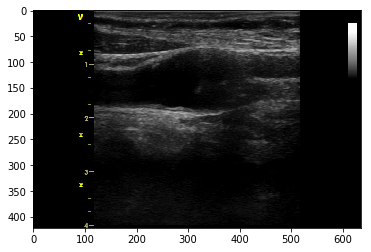

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K14Q


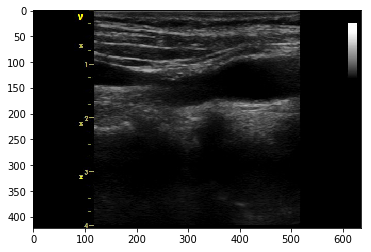

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DS


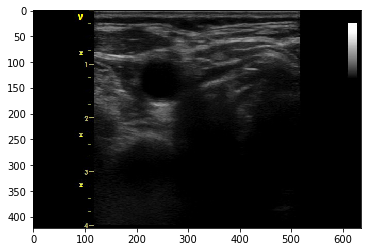

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DG


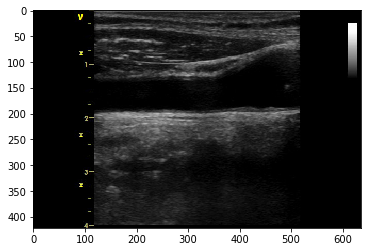

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K0SI


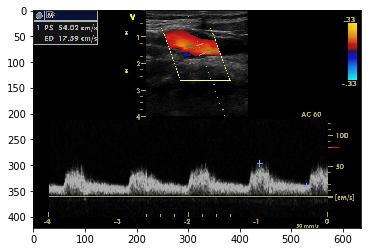

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DK


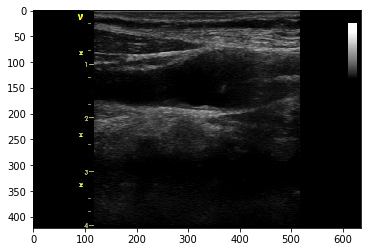

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K150


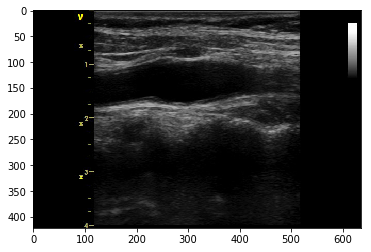

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1M2


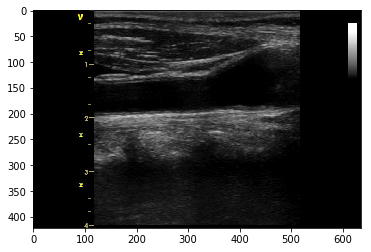

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K15C


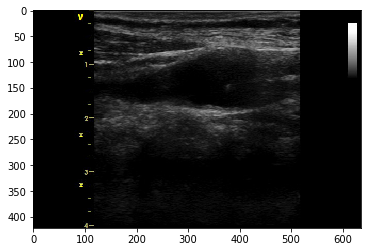

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K154


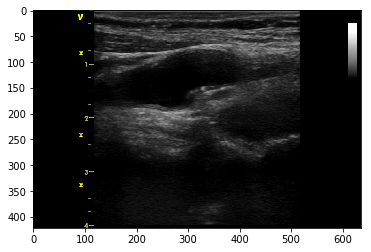

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K14S


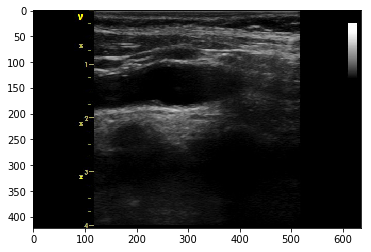

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1LU


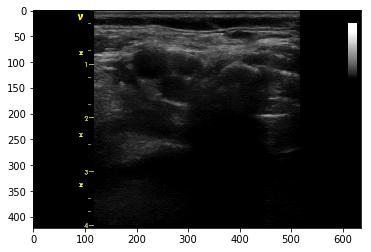

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DI


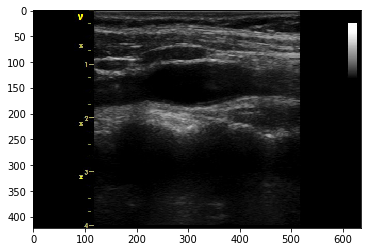

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1M0


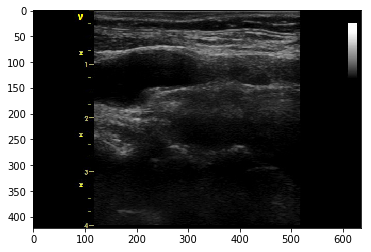

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K15A


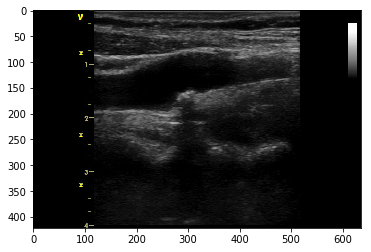

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K14M


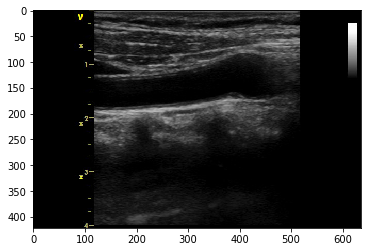

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1M4


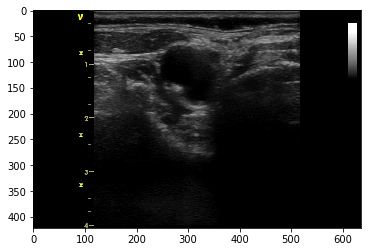

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DE


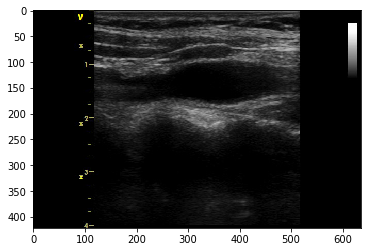

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DQ


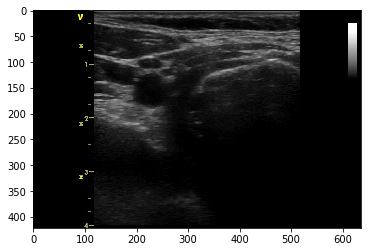

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1O4


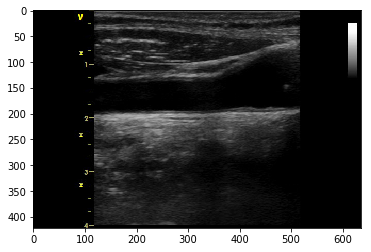

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K0SG


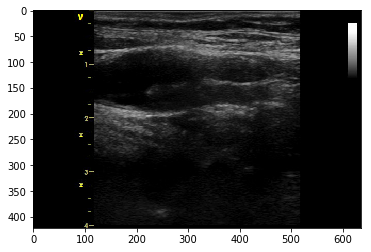

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K158


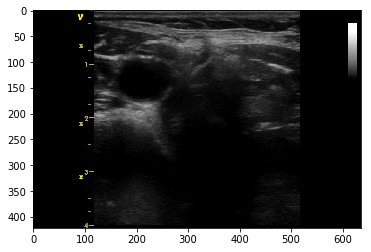

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1O2


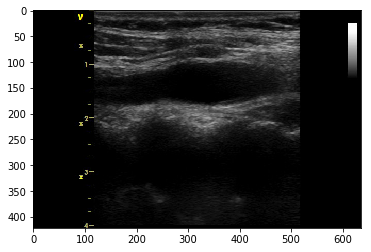

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/GB093527/D7I9K1DO


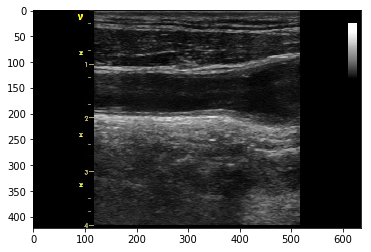

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQPS


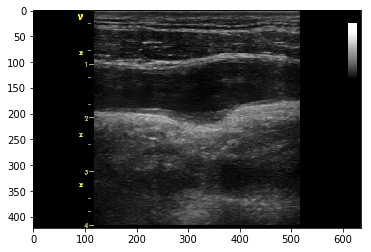

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQHM


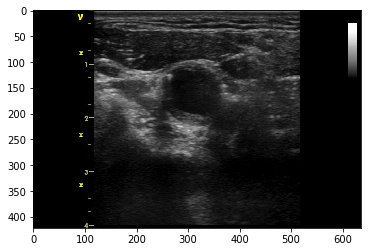

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PR28


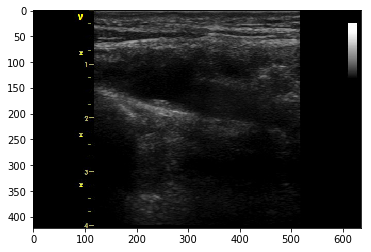

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0K


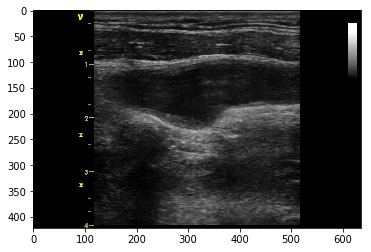

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQQ0


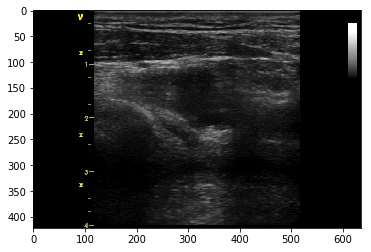

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQPU


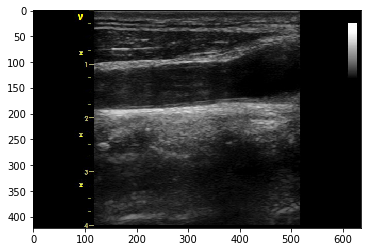

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ90


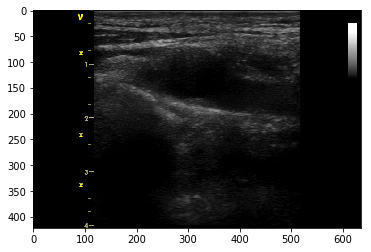

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0Q


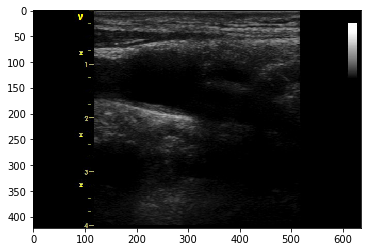

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0C


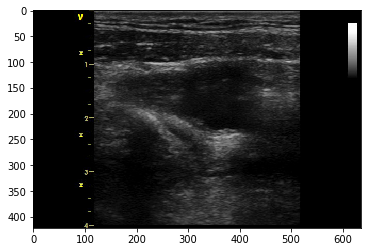

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQQ2


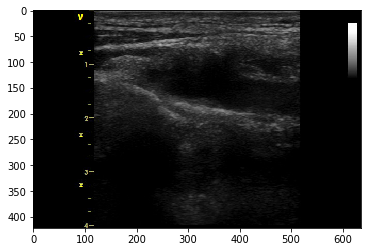

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0M


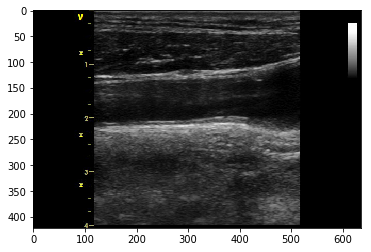

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PR26


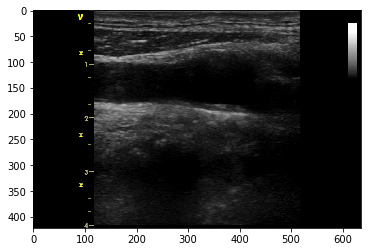

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0A


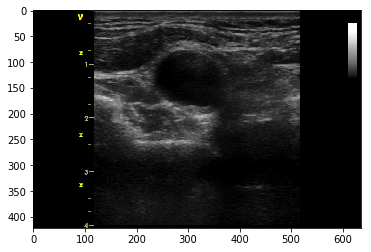

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ92


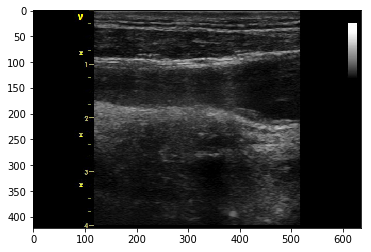

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQHI


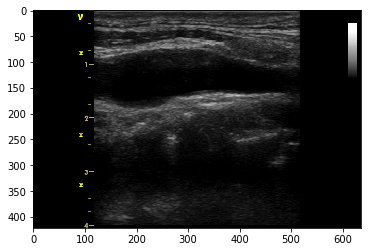

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0E


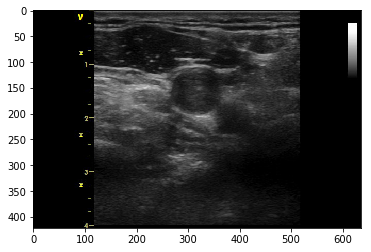

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PR2C


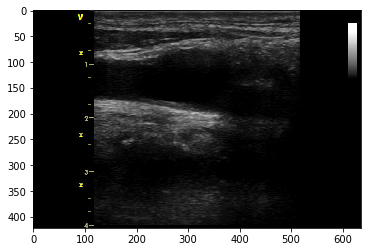

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0G


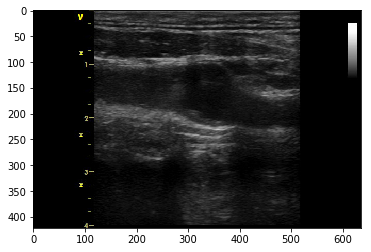

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ98


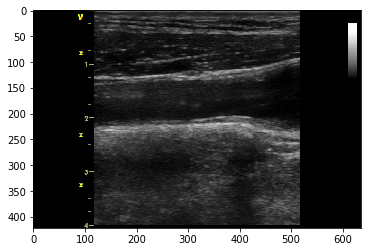

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PR24


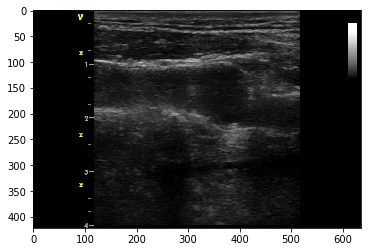

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ9C


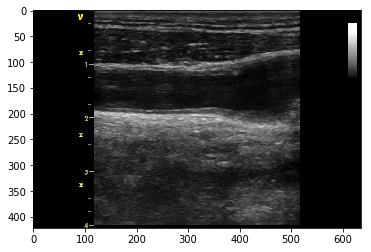

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQHE


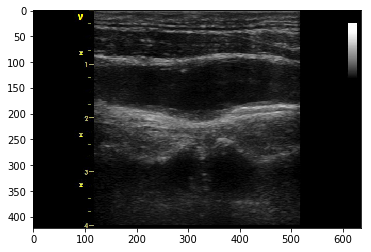

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ9A


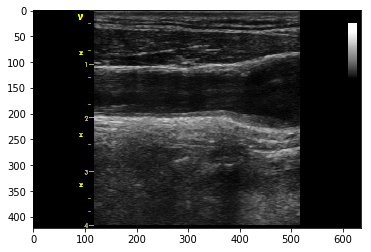

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQPQ


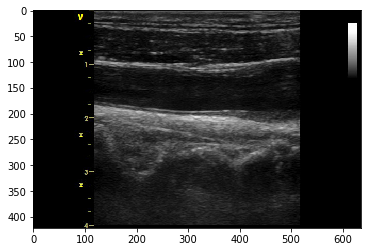

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ96


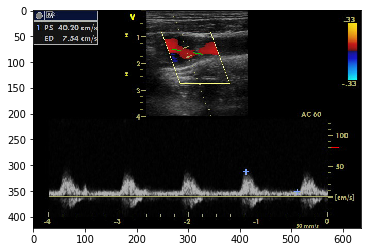

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PR2E


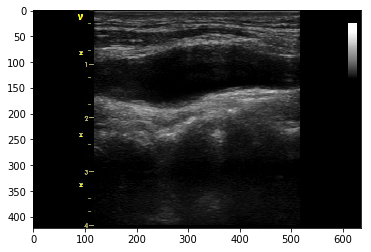

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ8U


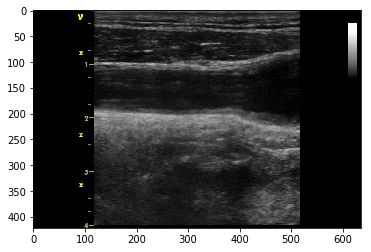

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQHK


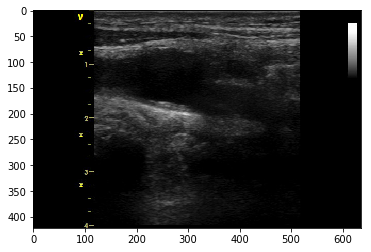

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ0I


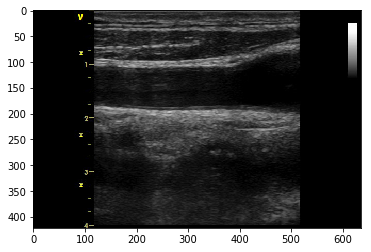

/data3/wv2019/data/PLIC_MILANO_DICOM/PLICV4_DISCO4/GEMS_IMG/2013_JUL/18/VC094611/D7I9PQ08


In [12]:
# directory tree:
# ROOT
# - PLIC<something>_DISCO<N>
#   - GEMS_IMG
#     - <YEAR>_<MONTH>
#       - <NN>
#         - <SOMEDIR>
#           - DICOMs

# organize DICOMs by patient ID
# start with a subset of imgs
for fn in glob.glob(os.path.join(ROOT, "*", "GEMS_IMG", "*", "*", "*", "*"), recursive=True)[:100]:
    ds = pydicom.read_file(fn)

    # clear private data
    ds.walk(person_names_callback)
    ds.walk(curves_callback)
    # address/sanitize patient IDs (remove spaces and non-alphanum characters)
    ds.data_element('PatientID').value = re.sub(r'\W+', '', ds.data_element('PatientID').value.strip().replace(" ", "_"))
    # type 2 tags
    if t2tag in ds:
        ds.data_element(t2tag).value = ''

    patientID = ds.PatientID
    dicomName = os.path.basename(fn).strip().replace(" ", "_")

    out_dir = os.path.join(ROOT_OUT, str(patientID))
    os.makedirs(out_dir, exist_ok=True)
    out_dicom = os.path.join(out_dir, f"{dicomName}.dcm")
    #out_png = os.path.join(out_dir, f"conv_{dicomName}.png")
    plt.imshow(ds.pixel_array)
    plt.show()
    
    print(fn)
    
    # write DICOM Standard compliant file
    #if not os.path.isfile(out_dicom):
    #    pydicom.filewriter.write_file(out_dicom, ds, write_like_original=False)
    # write PNG for non-doppler images
    # NOTE: not needed at first, let's keep also Doppler mode
    #if len(ds.SequenceOfUltrasoundRegions) == 1 :
    #    if not os.path.isfile(out_png):
    #        cv2.imwrite(out_png, ds.pixel_array)
